In [1]:
from wraptrain import ReadImage,OriginModNetDataLoader,ImageMatteLoader,ModNetImageGenerator,NetTrainer
base_path = "/mnt/data/human/Test/"
fg = base_path+"Comp"
matte= base_path+"Alpha"
files = ReadImage(fg,matte).read_same_names()

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-05 19:10:12.222359: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-05 19:10:12.269185: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-05 19:10:12.269215: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-05 19:10:12.269249: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has alrea

In [2]:
files.shape

(2250, 2)

In [3]:
from wrapown import  OwnNetTrainer
from src.models.finitenetv2 import FiniteNet
#begin = FiniteNet()

In [4]:
all_data = OriginModNetDataLoader(files,[512,512],hot_path=base_path+"newHeatmaps.pt")
#model = begin.to("cuda")

In [5]:
files["FG"][7]

'/mnt/data/human/Test/Comp/active-woman-being-full-energy-jumps-high-air-wears-sportsclothes-prepares-sport-competitions_15.png'

In [6]:
#begin_dream = OwnNetTrainer(model,ckpt_path="tests/checkpoint_5.pth")
begin_dream = OwnNetTrainer(FiniteNet())

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


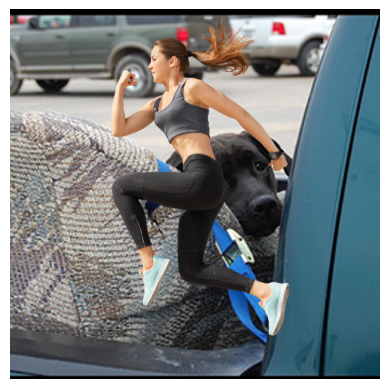

In [7]:
all_data.show_with_key(idx=12,model=begin_dream.get_model())

In [8]:
fuck= ModNetImageGenerator(files,begin_dream.get_model())

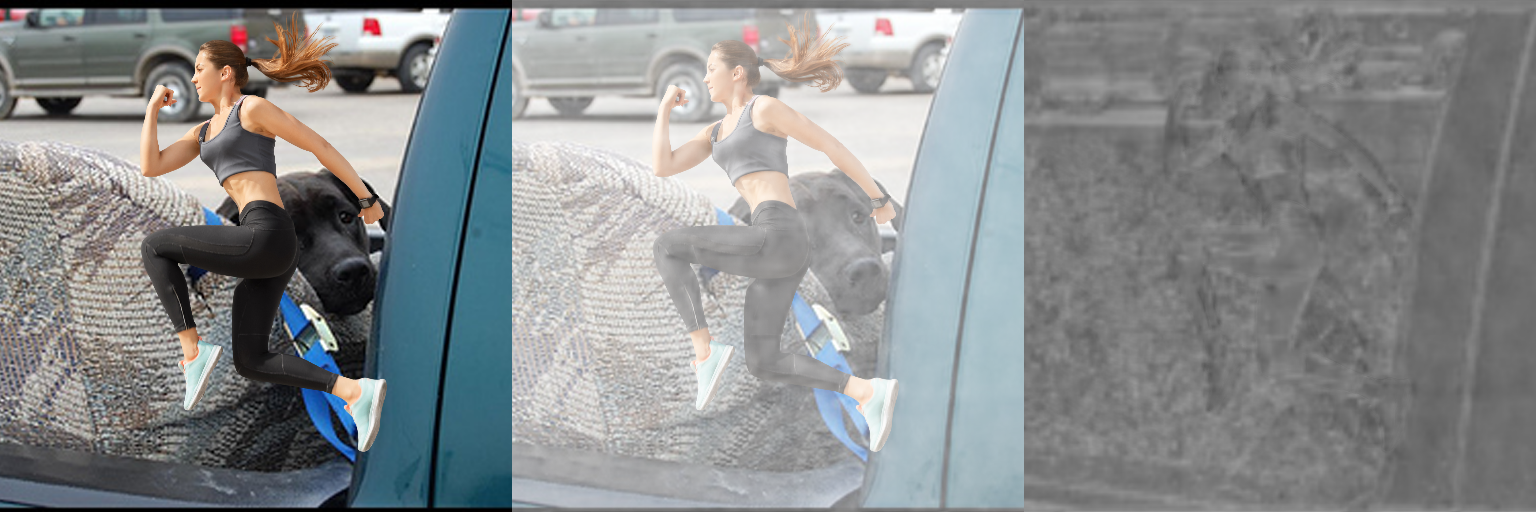

(<PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=L size=512x512>)

In [9]:
fuck.show(12,[512,512])

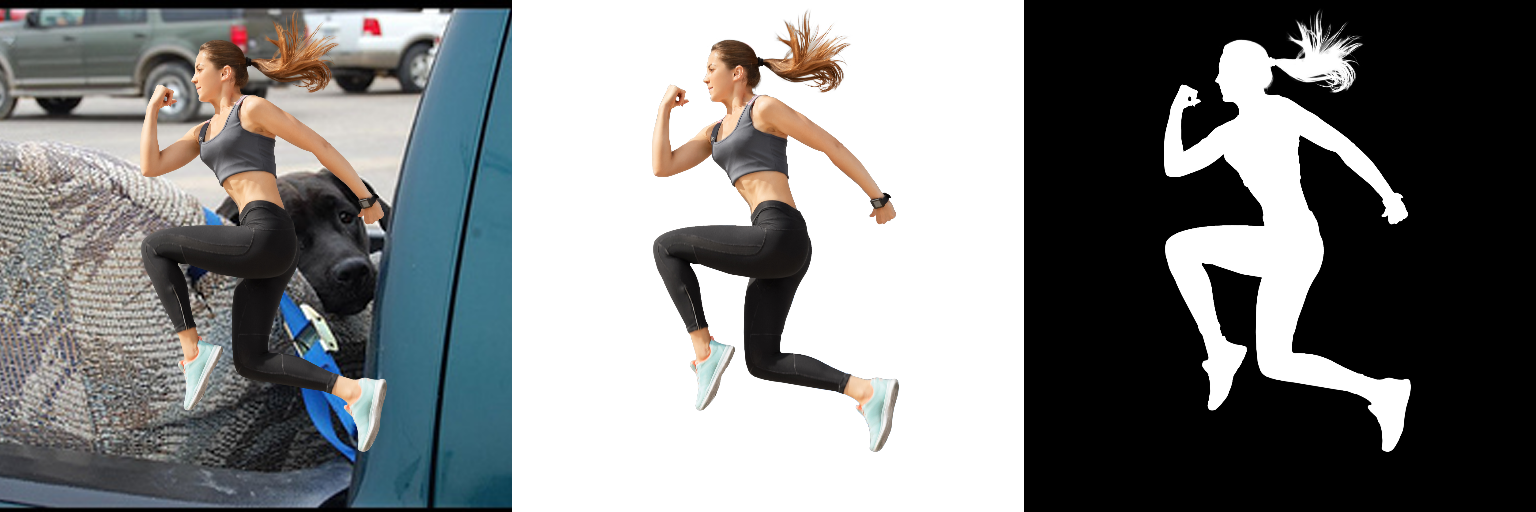

(<PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=L size=512x512>)

In [10]:
see = ImageMatteLoader(files)
see.show(12,[512,512])

In [11]:
!ls "tests"

checkpoint_10.pth  checkpoint_5.pth


In [ ]:
begin_dream.train_with_key(all_data,epochs=50,checkpoint_dir="tests",batch_size=16)

Loaded checkpoint from tests/checkpoint_10.pth. Starting from epoch 10
Saved checkpoint to tests/checkpoint_15.pth


In [ ]:
import importlib
import torch
import  src.models.finitenetv2 as oo
import  src.models.finitenet as la
import  src.models.finitenetsmall as ss
# 重新载入包含 FiniteNet 类的模块
import torch
import src.models.modnet as mo



In [ ]:
importlib.reload(mo)
importlib.reload(oo)
importlib.reload(ss)
importlib.reload(la)

mod = mo.MODNet().cuda()
smallv2=oo.FiniteNet().cuda()
large=la.FiniteNet().cuda()
smallv1=ss.FiniteNet().cuda()

In [ ]:
small = smallv2

In [ ]:
import torch
from torch.utils.benchmark import Timer, Compare
input_data = torch.rand([1, 3, 512, 512]).cuda()
timer = Timer(
    stmt='small(input_data)[1]',
    setup='from __main__ import small, input_data',
    globals={'small': small, 'input_data': input_data},
    num_threads=torch.get_num_threads(),
)

# 执行测量
results = timer.timeit(100)  # 重复100次测量以获得平均值
print(results)


In [ ]:
smallv2(torch.rand([1,3,512,512]).cuda())[2].shape


In [ ]:
smallv1(torch.rand([1,3,512,512]).cuda())[2].shape

In [ ]:
large(torch.rand([1,3,512,512]).cuda())[2].shape